The direct colab link to this notebook is [here](https://colab.research.google.com/github/D3Mlab/ppandas/blob/master/examples/pJoin_mismatches.ipynb).

The datasets used can be found [here](https://github.com/D3Mlab/ppandas/tree/master/tests/testing).

# Installing pre-requisites and ppandas

In [0]:
!pip install -i https://test.pypi.org/simple/ PPandas==0.0.1.6.9
!pip install pgmpy==0.1.9
!pip install networkx==2.4
!pip install matplotlib
!pip install python-intervals
import pandas as pd
from ppandas import PDataFrame

Looking in indexes: https://test.pypi.org/simple/
  Found existing installation: PPandas 0.0.1.6.6
    Uninstalling PPandas-0.0.1.6.6:
      Successfully uninstalled PPandas-0.0.1.6.6


#**Spatial mismatch handling example**
### Reference dataframe uses polygons and secondary dataframe uses points

In [0]:
df1 = pd.read_csv("testing/spatial-ref-region-point.csv")
df1.rename(columns={"Region":"Location"},inplace=True)
df2_point = pd.read_csv("testing/spatial-sec-region-point.csv",usecols=["Point","A"])
df2_point.rename(columns={"Point":"Location"},inplace=True)

pd1 = PDataFrame(["Location"],df1)
pd2_point = PDataFrame(["Location"],df2_point)

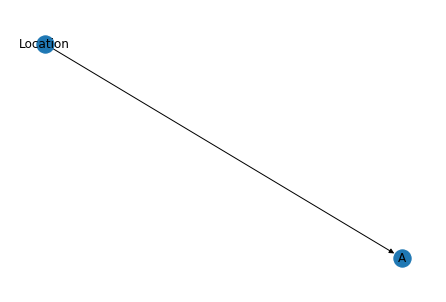

+-----------------------------------------------+-----+
| Location(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | 0.8 |
+-----------------------------------------------+-----+
| Location(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | 0.2 |
+-----------------------------------------------+-----+
+----------+-----------------------------------------------+-----------------------------------------------+
| Location | Location(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | Location(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) |
+----------+-----------------------------------------------+-----------------------------------------------+
| A(0)     | 0.375                                         | 1.0                                           |
+----------+-----------------------------------------------+-----------------------------------------------+
| A(1)     | 0.625                                         | 0.0                                           |
+----------+-----------------------------------------------+------

In [0]:
pd1.visualise(show_tables=True)

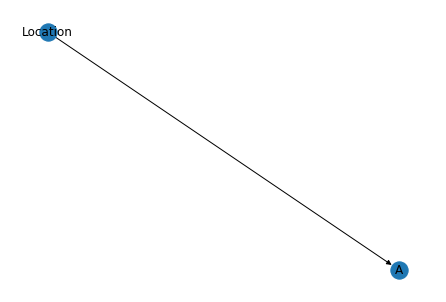

+---------------------------+-----+
| Location(POINT (0.5 0.5)) | 0.5 |
+---------------------------+-----+
| Location(POINT (0.5 1.5)) | 0.5 |
+---------------------------+-----+
+----------+---------------------------+---------------------------+
| Location | Location(POINT (0.5 0.5)) | Location(POINT (0.5 1.5)) |
+----------+---------------------------+---------------------------+
| A(0)     | 0.6                       | 0.2                       |
+----------+---------------------------+---------------------------+
| A(1)     | 0.4                       | 0.8                       |
+----------+---------------------------+---------------------------+


In [0]:
pd2_point.visualise(show_tables=True)

In [0]:
pd_join = pd1.pjoin(pd2_point, mismatches={"Location":"spatial"})

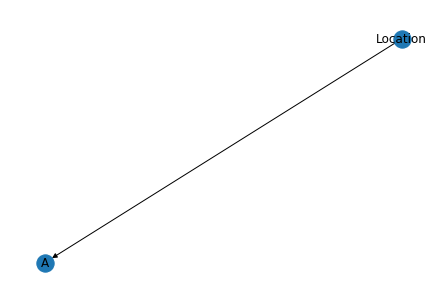

+-----------------------------------------------+-----+
| Location(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | 0.8 |
+-----------------------------------------------+-----+
| Location(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | 0.2 |
+-----------------------------------------------+-----+
+----------+-----------------------------------------------+-----------------------------------------------+
| Location | Location(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | Location(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) |
+----------+-----------------------------------------------+-----------------------------------------------+
| A(0)     | 0.4875                                        | 0.6                                           |
+----------+-----------------------------------------------+-----------------------------------------------+
| A(1)     | 0.5125                                        | 0.4                                           |
+----------+-----------------------------------------------+------

In [0]:
pd_join.visualise(show_tables=True)

In [0]:
queryResult = pd_join.query(['A'],{"Location":"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))"})
queryResult

,A,Probability(A)
0,0.0,0.6
1,1.0,0.4


### Reference dataframe uses polygons and secondary dataframe uses two columns  for X,Y coordinates:

In [0]:
#df2_x_y is identical to df2_point, except it has the X,Y coordinates in two columns
df2_x_y = pd.read_csv("testing/spatial-sec-region-point.csv",usecols=["X","Y","A"])
#zip together X and Y to make one Location column
df2_x_y['Location'] = list(zip(df2_x_y.X, df2_x_y.Y))
df2_x_y.drop(columns=["X","Y"],inplace=True)

In [0]:
pd2_x_y = PDataFrame(["Location"],df2_x_y)

In [0]:
pd_join = pd1.pjoin(pd2_x_y, mismatches={"Location":"spatial"})

In [0]:
queryResult = pd_join.query(['A'],{"Location":"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))"})

In [0]:
queryResult

,A,Probability(A)
0,0.0,0.6
1,1.0,0.4


### Reference dataframe uses polygons and secondary dataframe uses polygons

In [0]:
df1 = pd.read_csv("testing/spatial-ref-region-region.csv")
df2 = pd.read_csv("testing/spatial-sec-region-region.csv")
pd1 = PDataFrame(["Region"],df1)
pd2 = PDataFrame(["Region"],df2)

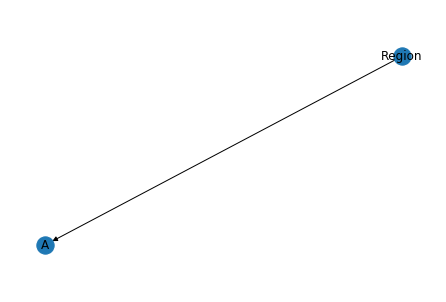

+---------------------------------------------------+-----+
| Region(POLYGON ((0 0, 1 0, 1 1.5, 0 1.5, 0 0)))   | 0.8 |
+---------------------------------------------------+-----+
| Region(POLYGON ((0 1.5, 1 1.5, 1 3, 0 3, 0 1.5))) | 0.2 |
+---------------------------------------------------+-----+
+--------+-------------------------------------------------+---------------------------------------------------+
| Region | Region(POLYGON ((0 0, 1 0, 1 1.5, 0 1.5, 0 0))) | Region(POLYGON ((0 1.5, 1 1.5, 1 3, 0 3, 0 1.5))) |
+--------+-------------------------------------------------+---------------------------------------------------+
| A(0)   | 0.375                                           | 1.0                                               |
+--------+-------------------------------------------------+---------------------------------------------------+
| A(1)   | 0.625                                           | 0.0                                               |
+--------+------------

In [0]:
pd1.visualise(show_tables=True)

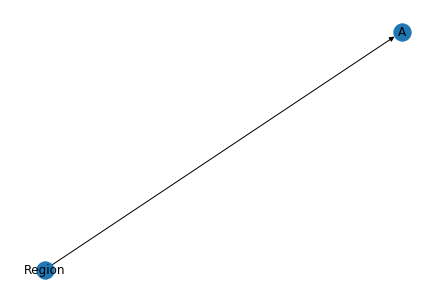

+---------------------------------------------+-----+
| Region(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | 0.5 |
+---------------------------------------------+-----+
| Region(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | 0.3 |
+---------------------------------------------+-----+
| Region(POLYGON ((0 2, 1 2, 1 3, 0 3, 0 2))) | 0.2 |
+---------------------------------------------+-----+
+--------+---------------------------------------------+---------------------------------------------+---------------------------------------------+
| Region | Region(POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))) | Region(POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))) | Region(POLYGON ((0 2, 1 2, 1 3, 0 3, 0 2))) |
+--------+---------------------------------------------+---------------------------------------------+---------------------------------------------+
| A(0)   | 0.6                                         | 0.0                                         | 0.5                                         |
+--------+----------------

In [0]:
pd2.visualise(show_tables=True)

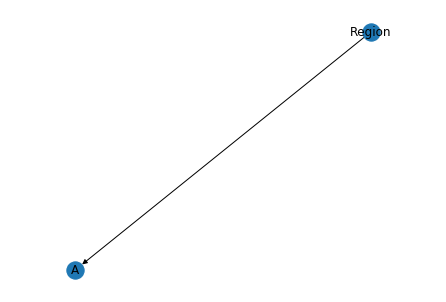

+---------------------------------------------------+-----------+
| Region(POLYGON ((1 0, 0 0, 0 1, 1 1, 1 0)))       | 0.533333  |
+---------------------------------------------------+-----------+
| Region(POLYGON ((1 1.5, 1 1, 0 1, 0 1.5, 1 1.5))) | 0.266667  |
+---------------------------------------------------+-----------+
| Region(POLYGON ((1 1.5, 0 1.5, 0 2, 1 2, 1 1.5))) | 0.0666667 |
+---------------------------------------------------+-----------+
| Region(POLYGON ((1 3, 1 2, 0 2, 0 3, 1 3)))       | 0.133333  |
+---------------------------------------------------+-----------+
+--------+---------------------------------------------+---------------------------------------------------+---------------------------------------------------+---------------------------------------------+
| Region | Region(POLYGON ((1 0, 0 0, 0 1, 1 1, 1 0))) | Region(POLYGON ((1 1.5, 1 1, 0 1, 0 1.5, 1 1.5))) | Region(POLYGON ((1 1.5, 0 1.5, 0 2, 1 2, 1 1.5))) | Region(POLYGON ((1 3, 1 2, 0 2, 0 3, 1

In [0]:
pd_join = pd1.pjoin(pd2, mismatches={"Region":"spatial"})
pd_join.visualise(show_tables=True)

In [0]:
queryResult = pd_join.query(['A'],{"Region":"POLYGON ((0 0, 1 0, 1 1.5, 0 1.5, 0 0))"})

In [0]:
queryResult

,A,Probability(A)
0,0.0,0.3875
1,1.0,0.6125


#**Numerical mismatch handling example**

Load data

In [0]:
df1 = pd.read_csv("numerical-1.csv")
df2 = pd.read_csv("numerical-2.csv")

pd1 = PDataFrame(["Gender","Age"],df1)
pd2 = PDataFrame(["Gender","Age"],df2)

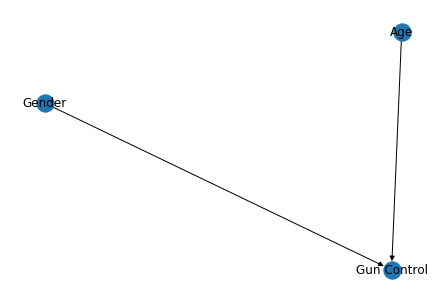

+--------------+----------+
| Age([20,40)) | 0.333333 |
+--------------+----------+
| Age([40,60)) | 0.333333 |
+--------------+----------+
| Age([60,80)) | 0.333333 |
+--------------+----------+
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Age                  | Age([20,40))   | Age([20,40)) | Age([40,60))   | Age([40,60)) | Age([60,80))   | Age([60,80)) |
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Gender               | Gender(female) | Gender(male) | Gender(female) | Gender(male) | Gender(female) | Gender(male) |
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Gun Control(Against) | 0.5            | 0.5          | 0.5            | 0.5          | 0.5            | 0.5          |
+----------------------+----------------+--------------+----------------+-----

In [0]:
pd1.visualise(show_tables=True)

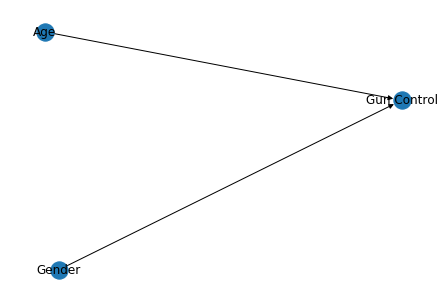

+--------------+----------+
| Age([20,50)) | 0.333333 |
+--------------+----------+
| Age([50,80)) | 0.666667 |
+--------------+----------+
+----------------------+----------------+--------------+----------------+--------------+
| Age                  | Age([20,50))   | Age([20,50)) | Age([50,80))   | Age([50,80)) |
+----------------------+----------------+--------------+----------------+--------------+
| Gender               | Gender(female) | Gender(male) | Gender(female) | Gender(male) |
+----------------------+----------------+--------------+----------------+--------------+
| Gun Control(Against) | 0.5            | 0.5          | 0.5            | 0.5          |
+----------------------+----------------+--------------+----------------+--------------+
| Gun Control(For)     | 0.5            | 0.5          | 0.5            | 0.5          |
+----------------------+----------------+--------------+----------------+--------------+
+----------------+-----+
| Gender(female) | 0.5 |
+--------

In [0]:
pd2.visualise(show_tables=True)

keyword argument mismatch takes in a dictionary with mismtach column names as keys and the type of mismatches as values

In [0]:
pd_join = pd1.pjoin(pd2,mismatches={"Age":'numerical'})

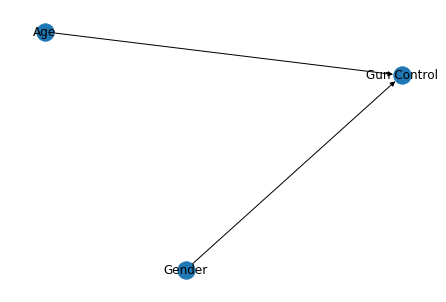

+--------------+----------+
| Age([20,40)) | 0.333333 |
+--------------+----------+
| Age([40,50)) | 0.166667 |
+--------------+----------+
| Age([50,60)) | 0.166667 |
+--------------+----------+
| Age([60,80)) | 0.333333 |
+--------------+----------+
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Age                  | Age([20,40))   | Age([20,40)) | Age([40,50))   | Age([40,50)) | Age([50,60))   | Age([50,60)) | Age([60,80))   | Age([60,80)) |
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Gender               | Gender(female) | Gender(male) | Gender(female) | Gender(male) | Gender(female) | Gender(male) | Gender(female) | Gender(male) |
+----------

In [0]:
pd_join.visualise(show_tables=True)

In [0]:
queryResult = pd_join.query(['Gun Control'],{"Gender":'female',"Age":'[40,60)'})

In [0]:
queryResult

,Gun Control,Probability(Gun Control)
0,Against,0.5
1,For,0.5


In [0]:
pd_join2 = pd2.pjoin(pd1, mismatches={'Age':'numerical'})

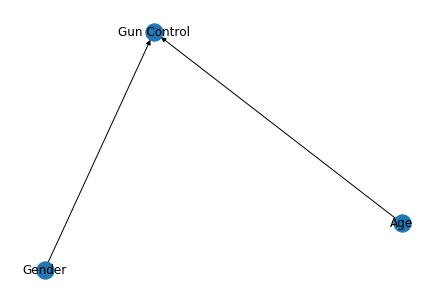

+--------------+----------+
| Age([20,40)) | 0.222222 |
+--------------+----------+
| Age([40,50)) | 0.111111 |
+--------------+----------+
| Age([50,60)) | 0.222222 |
+--------------+----------+
| Age([60,80)) | 0.444444 |
+--------------+----------+
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Age                  | Age([20,40))   | Age([20,40)) | Age([40,50))   | Age([40,50)) | Age([50,60))   | Age([50,60)) | Age([60,80))   | Age([60,80)) |
+----------------------+----------------+--------------+----------------+--------------+----------------+--------------+----------------+--------------+
| Gender               | Gender(female) | Gender(male) | Gender(female) | Gender(male) | Gender(female) | Gender(male) | Gender(female) | Gender(male) |
+----------

In [0]:
pd_join2.visualise(show_tables=True)

#**Categorical mismatch handling example**

In [0]:
pd_join3 = pd1.pjoin(pd2, mismatches={'Age':'categorical'})

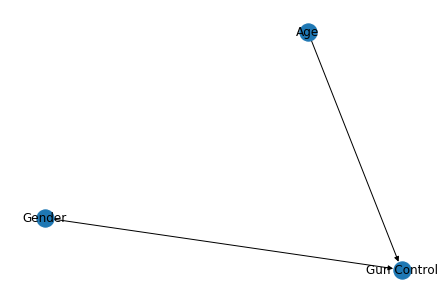

+----------------------+----------+
| Age([20,40),[20,50)) | 0.166667 |
+----------------------+----------+
| Age([20,40),[50,80)) | 0.166667 |
+----------------------+----------+
| Age([40,60),[20,50)) | 0.166667 |
+----------------------+----------+
| Age([40,60),[50,80)) | 0.166667 |
+----------------------+----------+
| Age([60,80),[20,50)) | 0.166667 |
+----------------------+----------+
| Age([60,80),[50,80)) | 0.166667 |
+----------------------+----------+
+----------------+-----+
| Gender(female) | 0.5 |
+----------------+-----+
| Gender(male)   | 0.5 |
+----------------+-----+
+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| Age                  | Age([20,40),[20,50)) | Age([20,40),[20,50)) | Age([40,60),[20,50)) | Age([40,60),

In [0]:
pd_join3.visualise(show_tables=True)